In [82]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl #มีโมดูลย่อยเอาไว้ใส่ Thai Font

# Any results you write to the current directory are saved as output. Jub Jub

In [117]:
fpen1 = mpl.font_manager.FontProperties(family='Bahnschrift',size=20) #ฟอนต์ eng Bahnschrift นี้เท่กว่าดั้งเดิม โดยใช้ command >>fontproperties=fpen1<< ใน plt
fpen2 = mpl.font_manager.FontProperties(family='Consolas',size=20) #ฟอนต์ eng Consolas นี้เท่กว่าดั้งเดิม โดยใช้ command >>fontproperties=fpen2<< ใน plt
fpth = mpl.font_manager.FontProperties(family='JasmineUPC',size=20) #ใส่ฟอนต์ไทย JasmineUPC เผื่ออยากใช้ภาษาไทยในกราฟต่างๆ โดยใช้ command >>fontfroperties=fpth<< ใน plt

In [84]:
data = pd.read_csv('https://raw.githubusercontent.com/artist0123/ProjectPSIT/main/master.csv', engine = 'python', sep = ',')

In [85]:
data.head()

,๏ปฟcountry,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [86]:
unique_country = data['๏ปฟcountry'].unique() #List รายชื่อประเทศที่นำมาใช้
print(unique_country)

['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'
 'South 

In [87]:
data_one = data[data.year >= 1987].groupby('year').sum()

This graph is a **<span style=color:red>comparision</span>** between year and suicide_no

Text(0, 0.5, 'จำนวนคน')

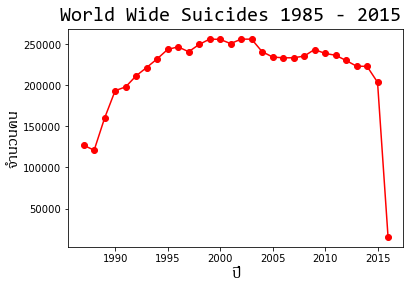

In [119]:
ax = plt.gca()
plt.plot(data_one.index, data_one['suicides_no'], 'ro-')
plt.figtext(.5,.91,'Worldwide Suicides 1985 - 2015', color='black', fontproperties=fpen2, ha='center')
ax.set_xlabel(u'ปี',fontproperties=fpth)
ax.set_ylabel(u'จำนวนคน',fontproperties=fpth)

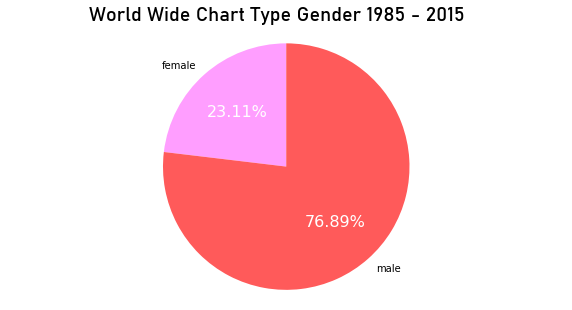

In [102]:
data_grp_mf = data.groupby(by=['sex']).agg({"suicides_no": ['sum']})
data_grp_mf.columns = ['total_suicide']
data_grp_mf.reset_index(inplace=True)
# data_grp_mf

fig1, ax1 = plt.subplots(figsize=(10, 5))
wedges, texts, autotexts = ax1.pie(data_grp_mf['total_suicide'], labels=data_grp_mf['sex'], autopct='%1.2f%%', startangle=90, colors=['#ff9eff', '#ff5a5a'])
ax1.axis('equal')

plt.setp(autotexts, size=16, color="w")
plt.figtext(.5,.91,'Worldwide Suicides by Gender 1985 - 2015', color='black', fontproperties=fpen, ha='center')
plt.show()